### 통합 Top100 카테고리별 점유

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request, urlretrieve
from urllib.request import Request

In [85]:
df = pd.read_csv("../무신사_남녀통합_카테고리별_순위/무신사_All_전체_Top100_20230920021633.csv")
df

,카테고리,순위,품번,브랜드명,상품명(한글),판매가,비회원가,좋아요 수,URL
0,전체,1,MB1F0117A,MANYOFACTORY,[사용기한 임박] 퓨어 클렌징 오일 400ml +55ml,49000,14900,316,https://www.musinsa.com/app/goods/3508560?loc=...
1,전체,2,IF0641,ADIDAS,삼바 Decon IF0641,179000,179000,2610,https://www.musinsa.com/app/goods/3543294?loc=...
2,전체,3,IF0642,ADIDAS,삼바 Decon IF0642,179000,179000,3238,https://www.musinsa.com/app/goods/3543293?loc=...
3,전체,4,EG4959,ADIDAS,슈퍼스타 - 블랙:화이트,139000,139000,60425,https://www.musinsa.com/app/goods/1622069?loc=...
4,전체,5,1111,LAFUDGESTORE,솔라노 에어플로우 윈드 자켓_Black,74900,37000,3578,https://www.musinsa.com/app/goods/3417474?loc=...
...,...,...,...,...,...,...,...,...,...
95,전체,96,UB-2340,UNIFORM BRIDGE,basic sweatshirts oatmeal,65000,52000,1791,https://www.musinsa.com/app/goods/1801195?loc=...
96,전체,97,UNION-SH05,UNION BLUE,LAUNDRY SHIRT (LAVENDER GRAY),62000,59000,10724,https://www.musinsa.com/app/goods/2375962?loc=...
97,전체,98,000413,SORANO,SORANO 11-SPORTY HOODIE ZIP-UP [3Color],98000,69000,13106,https://www.musinsa.com/app/goods/3426543?loc=...
98,전체,99,COTA01,TYPESERVICE,Typeservice Web Cap [Dark Gray],39000,35100,52034,https://www.musinsa.com/app/goods/2134140?loc=...


In [86]:
category_list = ['상의', '아우터', '바지', '원피스', '스커트', '스니커즈', '신발', '가방', '여성 가방','스포츠용품', 
            '모자', '양말레그웨어', '속옷', '선글라스안경테', '액세서리', '시계', '주얼리', '뷰티', '디지털테크', '리빙',
            '컬쳐', '반려동물']

In [87]:
for i in range(len(df)):
  html = Request(df.iloc[i]['URL'], headers={'User-Agent' : 'Mozilla/5.0'})
  page = urlopen(html)
  
  selector = '#page_product_detail > div.right_area.page_detail_product > div.right_contents.section_product_summary > div.product_info > p > a:nth-child(1)'
  soup = bs(page, 'html.parser')
  selected = soup.select_one(selector)
  
  if selected:
    cat = selected.get_text()
    if cat in category_list:
      df['카테고리'][i] = cat
    else:
      df['카테고리'][i] = '기타'

<ipython-input-87-785bb24f789b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['카테고리'][i] = cat
<ipython-input-87-785bb24f789b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['카테고리'][i] = '기타'


In [107]:
df

,카테고리,순위,품번,브랜드명,상품명(한글),판매가,비회원가,좋아요 수,URL
0,뷰티,1,MB1F0117A,MANYOFACTORY,[사용기한 임박] 퓨어 클렌징 오일 400ml +55ml,49000,14900,316,https://www.musinsa.com/app/goods/3508560?loc=...
1,스니커즈,2,IF0641,ADIDAS,삼바 Decon IF0641,179000,179000,2610,https://www.musinsa.com/app/goods/3543294?loc=...
2,스니커즈,3,IF0642,ADIDAS,삼바 Decon IF0642,179000,179000,3238,https://www.musinsa.com/app/goods/3543293?loc=...
3,스니커즈,4,EG4959,ADIDAS,슈퍼스타 - 블랙:화이트,139000,139000,60425,https://www.musinsa.com/app/goods/1622069?loc=...
4,아우터,5,1111,LAFUDGESTORE,솔라노 에어플로우 윈드 자켓_Black,74900,37000,3578,https://www.musinsa.com/app/goods/3417474?loc=...
...,...,...,...,...,...,...,...,...,...
95,상의,96,UB-2340,UNIFORM BRIDGE,basic sweatshirts oatmeal,65000,52000,1791,https://www.musinsa.com/app/goods/1801195?loc=...
96,상의,97,UNION-SH05,UNION BLUE,LAUNDRY SHIRT (LAVENDER GRAY),62000,59000,10724,https://www.musinsa.com/app/goods/2375962?loc=...
97,아우터,98,000413,SORANO,SORANO 11-SPORTY HOODIE ZIP-UP [3Color],98000,69000,13106,https://www.musinsa.com/app/goods/3426543?loc=...
98,모자,99,COTA01,TYPESERVICE,Typeservice Web Cap [Dark Gray],39000,35100,52034,https://www.musinsa.com/app/goods/2134140?loc=...


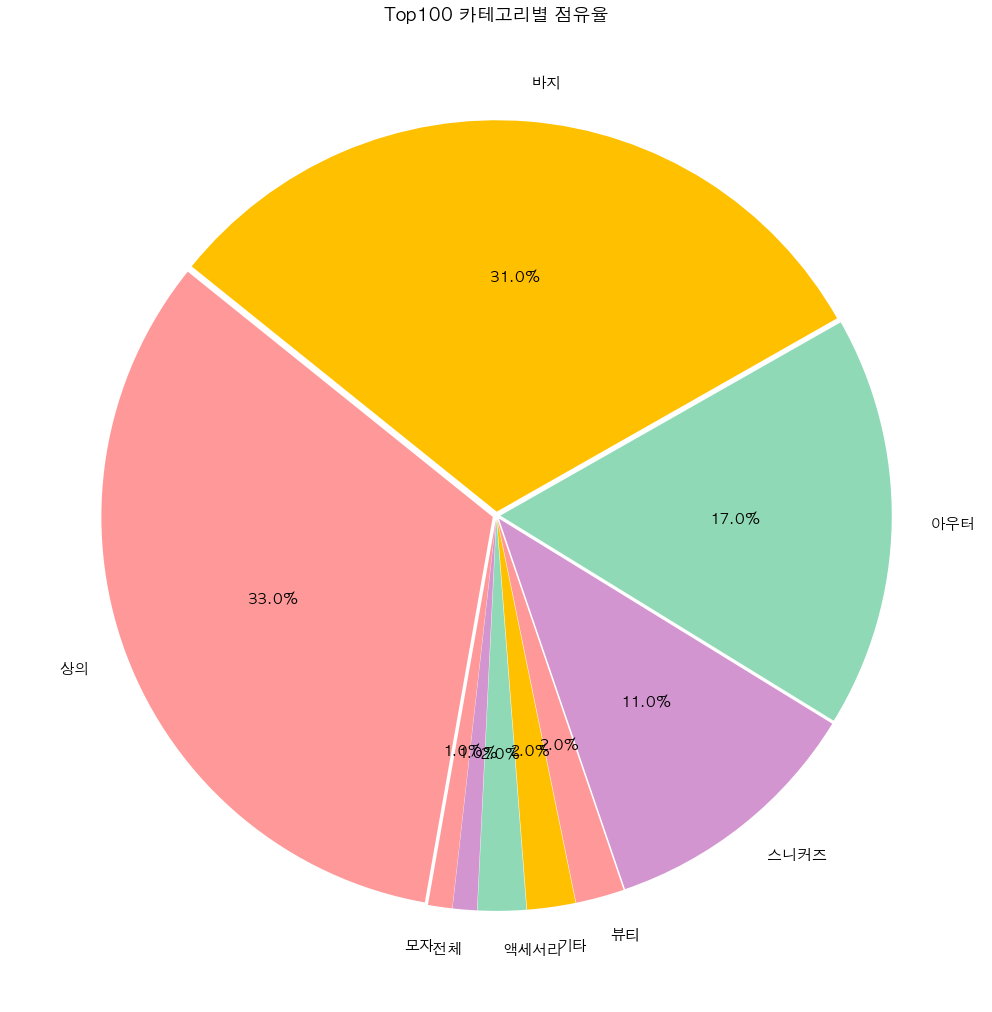

In [89]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', size=15)
plt.figure(figsize=(30, 18))

sizes = df['카테고리'].value_counts()
labels = df['카테고리'].value_counts().index.tolist()

explode = [0.01] * len(labels)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, colors=colors)
plt.title(f'Top100 카테고리별 점유율')
plt.show()

In [90]:
data = df[['카테고리', '판매가', '비회원가', '좋아요 수']]
data.groupby(['카테고리']).describe()

판매가                                                            \
     count           mean           std      min       25%       50%   
카테고리                                                                   
기타     2.0   79450.000000  84216.417639  19900.0   49675.0   79450.0   
모자     1.0   39000.000000           NaN  39000.0   39000.0   39000.0   
바지    31.0   58006.451613  16784.058617  32000.0   49000.0   52800.0   
뷰티     2.0   44500.000000   6363.961031  40000.0   42250.0   44500.0   
상의    33.0   73215.151515  42340.658069  15900.0   49800.0   63000.0   
스니커즈  11.0  138727.272727  53456.694453  59000.0  109000.0  139000.0   
아우터   17.0  100211.764706  29102.274017  45000.0   83900.0   99000.0   
액세서리   2.0   29450.000000  19162.593770  15900.0   22675.0   29450.0   
전체     1.0   79000.000000           NaN  79000.0   79000.0   79000.0   

                          비회원가                 ...                     좋아요 수  \
           75%       max count           mean  ...       75%       max count   
카테고리                                           ...                             
기타    109225.0  139000.0   2.0   79450.000000  ...  109225.0  139000.0   2.0   
모자     39000.0   39000.0   1.0   35100.000000  ...   35100.0   35100.0   1.0   
바지     66200.0   97900.0  31.0   43204.193548  ...   42950.0   69500.0  31.0   
뷰티     46750.0   49000.0   2.0   15950.000000  ...   16475.0   17000.0   2.0   
상의     89000.0  199000.0  33.0   58067.878788  ...   59800.0  199000.0  33.0   
스니커즈  159000.0  260000.0  11.0  132377.272727  ...  159000.0  260000.0  11.0   
아우터   119000.0  158000.0  17.0   77328.235294  ...   94900.0  150100.0  17.0   
액세서리   36225.0   43000.0   2.0   22850.000000  ...   26325.0   29800.0   2.0   
전체     79000.0   79000.0   1.0   47400.000000  ...   47400.0   47400.0   1.0   

                                                                        \
              mean           std      min       25%      50%       75%   
카테고리                                                                     
기타    44870.500000  57260.800034   4381.0  24625.75  44870.5  65115.25   
모자    52034.000000           NaN  52034.0  52034.00  52034.0  52034.00   
바지    56892.677419  60984.872213   1362.0  12358.00  40921.0  89087.00   
뷰티      189.500000    178.898016     63.0    126.25    189.5    252.75   
상의    30429.000000  27618.757936    187.0   9735.00  22716.0  47559.00   
스니커즈  31894.363636  43475.778280   2610.0   3349.50  12594.0  38032.50   
아우터   32563.705882  49191.895571    551.0   4149.00  11267.0  42488.00   
액세서리  59511.500000  32833.089171  36295.0  47903.25  59511.5  71119.75   
전체     8701.000000           NaN   8701.0   8701.00   8701.0   8701.00   

                
           max  
카테고리            
기타     85360.0  
모자     52034.0  
바지    235479.0  
뷰티       316.0  
상의     95959.0  
스니커즈  118900.0  
아우터   199093.0  
액세서리   82728.0  
전체      8701.0  

[9 rows x 24 columns]

In [91]:
data2 = data.groupby(['카테고리'], as_index=False).mean()
data2.columns

Index(['카테고리', '판매가', '비회원가', '좋아요 수'], dtype='object')

### 카테고리별 평균 판매가 및 평균 비회원가 비교

Text(0.5, 1.0, '카테고리별 평균 판매가')

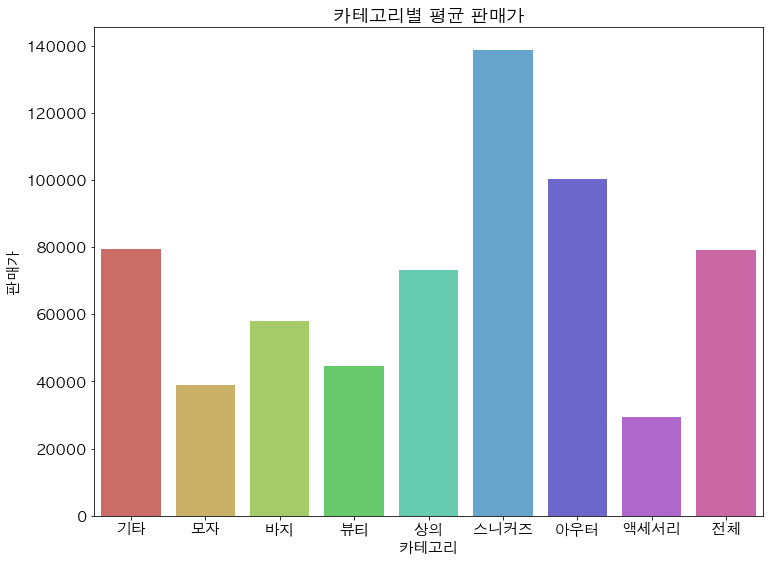

In [92]:
plt.figure(figsize=(12,9))
sns.barplot(x = '카테고리', y='판매가', data=data2, palette='hls')
plt.title('카테고리별 평균 판매가')

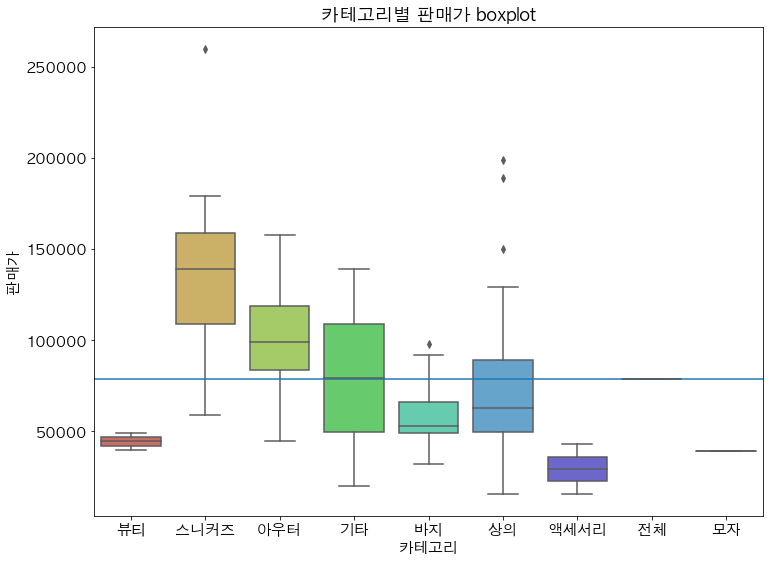

In [113]:
plt.figure(figsize=(12,9))
sns.boxplot(y='판매가', x='카테고리', data=data, palette='hls')
plt.title('카테고리별 판매가 boxplot')
plt.axhline(y=data['판매가'].mean(), linestyle='solid')
plt.show()

Text(0.5, 1.0, '카테고리별 평균 비회원가')

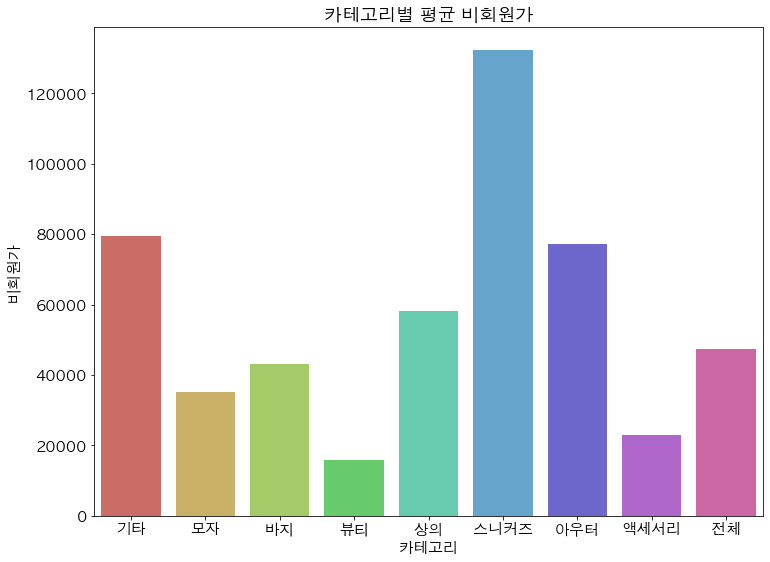

In [94]:
plt.figure(figsize=(12,9))
sns.barplot(x = '카테고리', y='비회원가', data=data2, palette='hls')
plt.title('카테고리별 평균 비회원가')

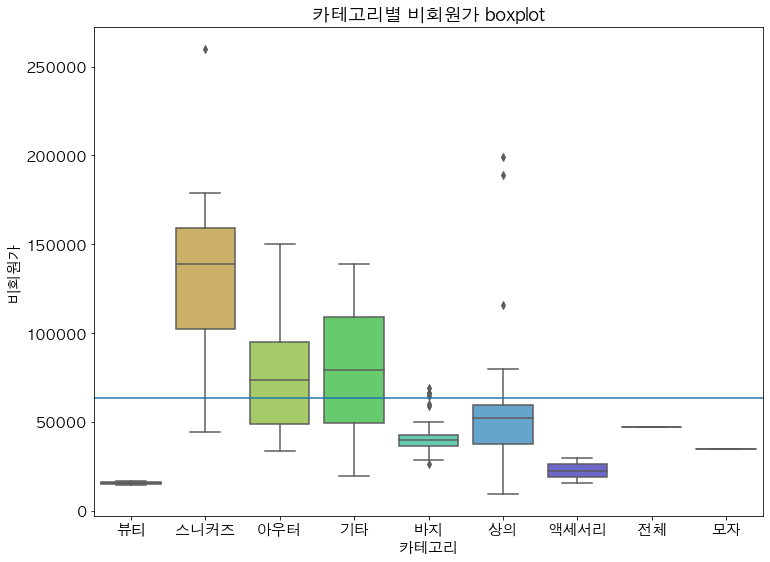

In [115]:
plt.figure(figsize=(12,9))
sns.boxplot(y='비회원가', x='카테고리', data=data, palette='hls')
plt.title('카테고리별 비회원가 boxplot')
plt.axhline(y=data['비회원가'].mean(), linestyle='solid')
plt.show()

Text(0.5, 1.0, '카테고리별 평균 좋아요 수')

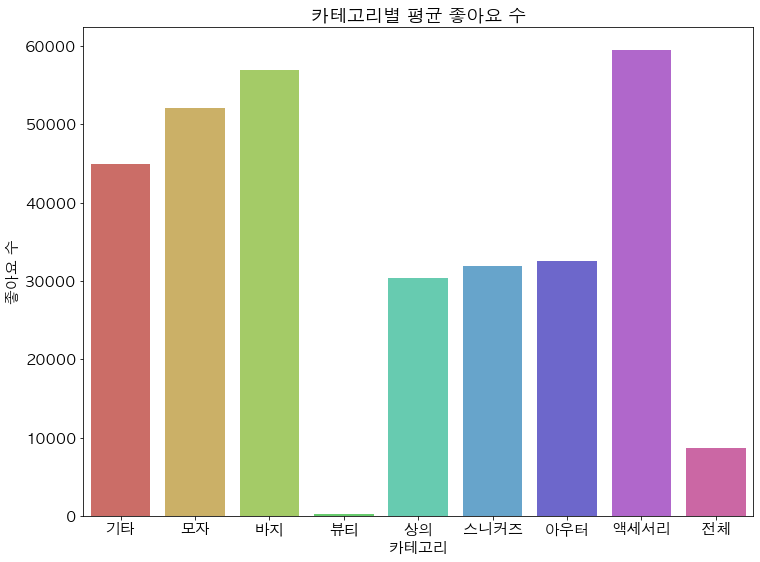

In [95]:
plt.figure(figsize=(12,9))
sns.barplot(x = '카테고리', y='좋아요 수', data=data2, palette='hls')
plt.title('카테고리별 평균 좋아요 수')

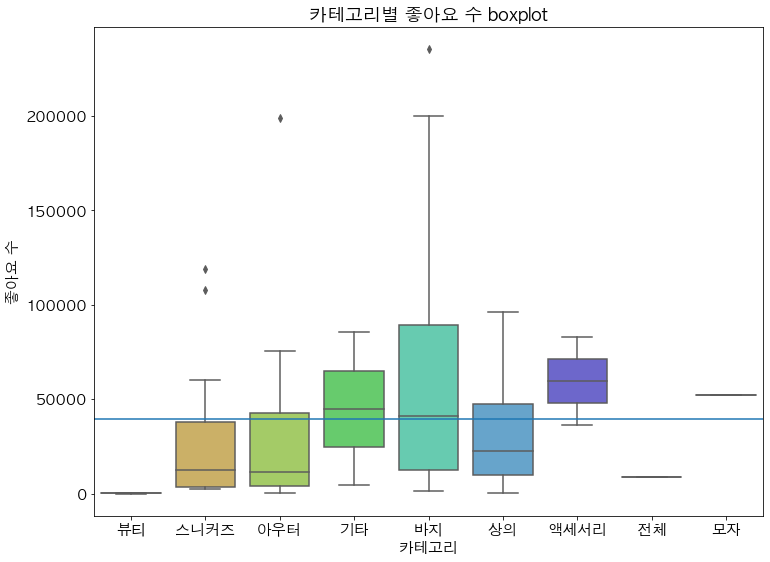

In [117]:
plt.figure(figsize=(12,9))
sns.boxplot(y='좋아요 수', x='카테고리', data=data, palette='hls')
plt.title('카테고리별 좋아요 수 boxplot')
plt.axhline(y=data['좋아요 수'].mean(), linestyle='solid')
plt.show()

In [96]:
df1 = pd.read_csv("../무신사_남녀통합_카테고리별_순위/무신사_All_상의_Top100_20230920022228.csv")
df2 = pd.read_csv("../무신사_남녀통합_카테고리별_순위/무신사_All_바지_Top100_20230920023256.csv")
df3 = pd.read_csv("../무신사_남녀통합_카테고리별_순위/무신사_All_아우터_Top100_20230920022730.csv")

In [97]:
df1['cost-effect'] = df1['좋아요 수'] / df1['판매가']
df2['cost-effect'] = df2['좋아요 수'] / df2['판매가']
df3['cost-effect'] = df3['좋아요 수'] / df3['판매가']

In [98]:
df1

,카테고리,순위,품번,브랜드명,상품명(한글),판매가,비회원가,좋아요 수,URL,cost-effect
0,상의,1,MMATS701-WH,MUSINSA STANDARD,레이어드 크루 넥 반팔 티셔츠_일반 기장 [화이트],16900,15190,86142,https://www.musinsa.com/app/goods/2086653?loc=...,5.097160
1,상의,2,MMATL411,MUSINSA STANDARD,베이식 긴팔 티셔츠 2팩,37800,32090,67560,https://www.musinsa.com/app/goods/2149254?loc=...,1.787302
2,상의,3,SPYWD49C01,SPAO,(시티보이) 오버핏 옥스포드 셔츠_SPYWD49C01,39900,35910,67067,https://www.musinsa.com/app/goods/2272830?loc=...,1.680877
3,상의,4,MNPOWOV16820444-100,POLO RALPH LAUREN,커스텀핏 옥스포드 셔츠 - 화이트,199000,199000,14130,https://www.musinsa.com/app/goods/1706633?loc=...,0.071005
4,상의,5,TRSHT04NV,TRILLION,컬러 배색 1992 그래픽 후드 (NAVY),49800,39800,39542,https://www.musinsa.com/app/goods/2995119?loc=...,0.794016
...,...,...,...,...,...,...,...,...,...,...
95,상의,96,CO2301CR01BK,COVERNAT,[23SS] C 로고 맨투맨 블랙,59000,41300,30620,https://www.musinsa.com/app/goods/1563621?loc=...,0.518983
96,상의,97,2082055,TWN,어센틱클래식 후드 네이비 STHD3338,60000,42200,11591,https://www.musinsa.com/app/goods/1786771?loc=...,0.193183
97,상의,98,CDHZ001,CROSSDRESSLY,트리플로고 하프집업,89000,64000,547,https://www.musinsa.com/app/goods/3555068?loc=...,0.006146
98,상의,99,YD01HD1007GR,YALE,(23FW) 2 TONE ARCH HOODIE GRAY,79000,63200,664,https://www.musinsa.com/app/goods/3463298?loc=...,0.008405


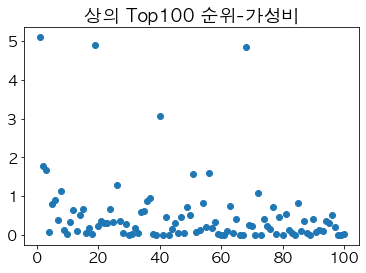

KeyError: '가성비'

In [99]:
X = df1["순위"]
y = df1["cost-effect"]
plt.plot(X, y, 'o')
plt.title('상의 Top100 순위-가성비')
plt.show()

print(df1['순위'].corr(df1['가성비']))

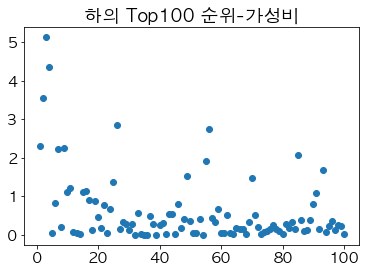

In [ ]:
X = df2["순위"]
y = df2["cost-effect"]
plt.plot(X, y, 'o')
plt.title('하의 Top100 순위-가성비')
plt.show()

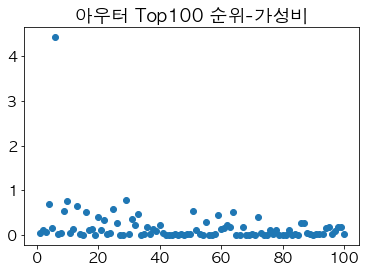

In [ ]:
X = df3["순위"]
y = df3["cost-effect"]
plt.plot(X, y, 'o')
plt.title('아우터 Top100 순위-가성비')
plt.show()

In [ ]:
data1_1 = df1.groupby(['브랜드명'], as_index=False).count()
data1_1.sort_values('품번', ascending=False, inplace=True)
data2_1 = df2.groupby(['브랜드명'], as_index=False).count()
data2_1.sort_values('품번', ascending=False, inplace=True)
data3_1 = df3.groupby(['브랜드명'], as_index=False).count()
data3_1.sort_values('품번', ascending=False, inplace=True)

Text(0.5, 1.0, '상의 Top100 브랜드별 품목 수')

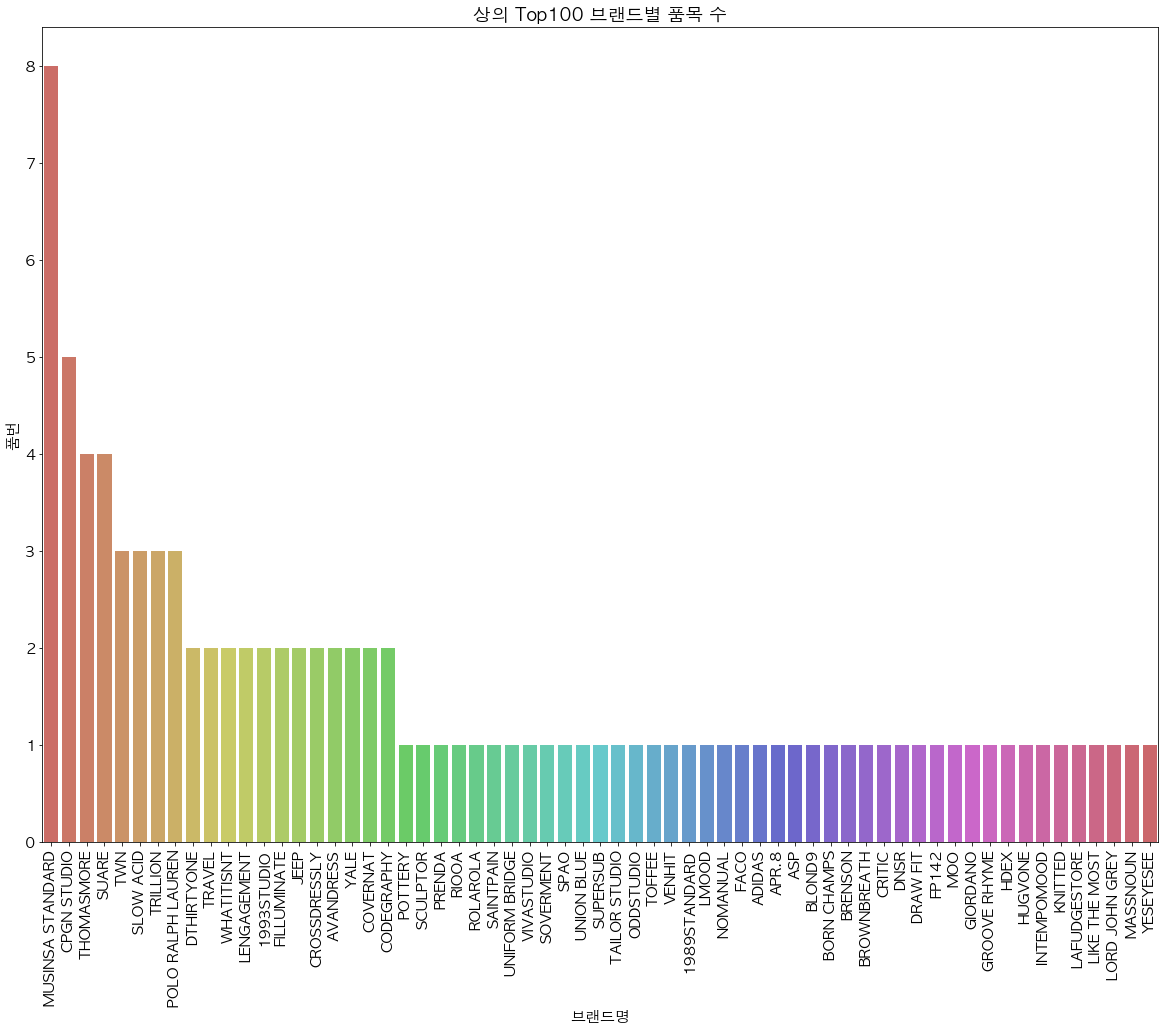

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x = '브랜드명', y='품번', data=data1_1, palette='hls')
plt.xticks(rotation=90)
plt.title('상의 Top100 브랜드별 품목 수')

Text(0.5, 1.0, '바지 Top100 브랜드별 품목 수')

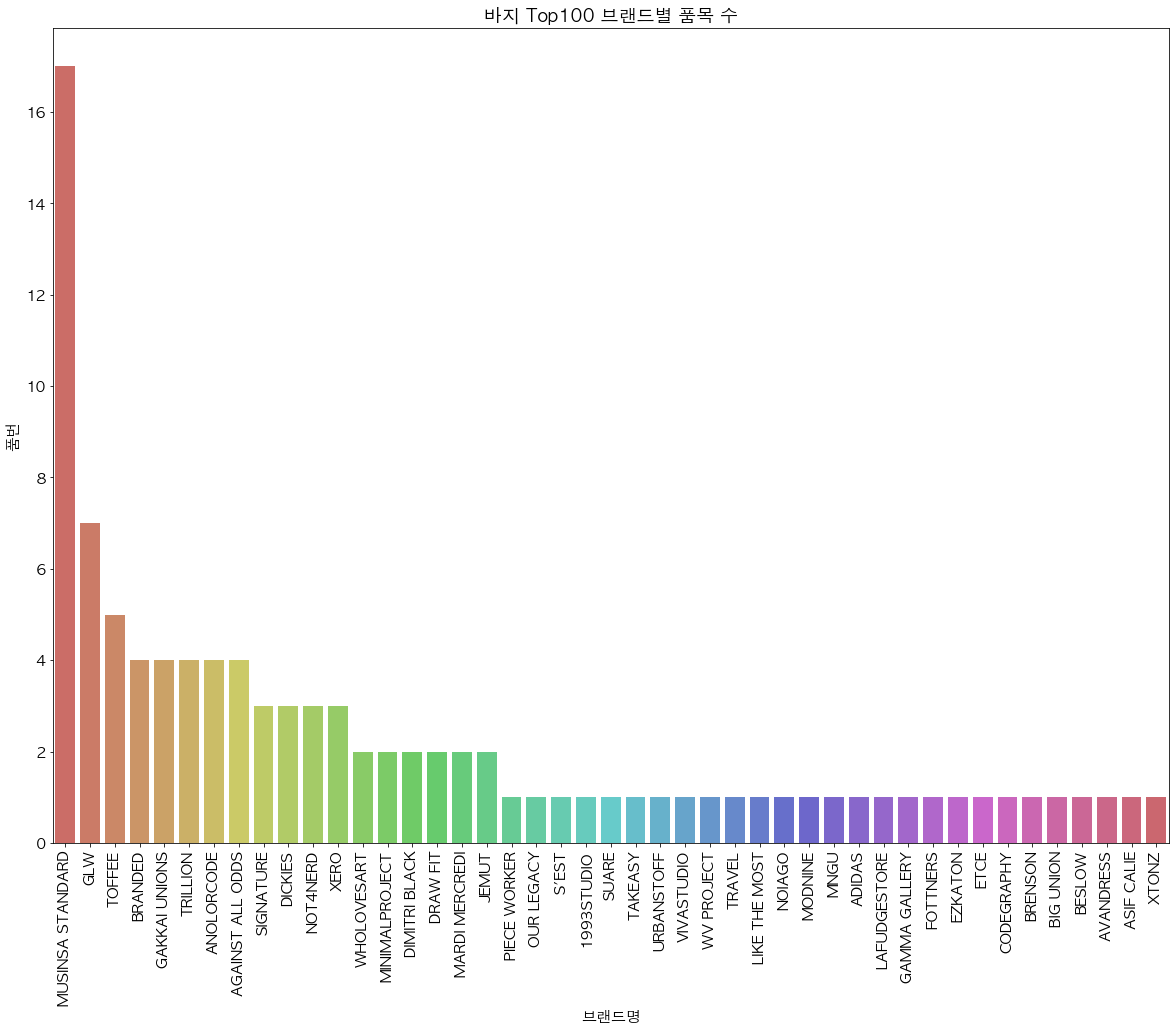

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x = '브랜드명', y='품번', data=data2_1, palette='hls')
plt.xticks(rotation=90)
plt.title('바지 Top100 브랜드별 품목 수')

Text(0.5, 1.0, '아우터 Top100 브랜드별 품목 수')

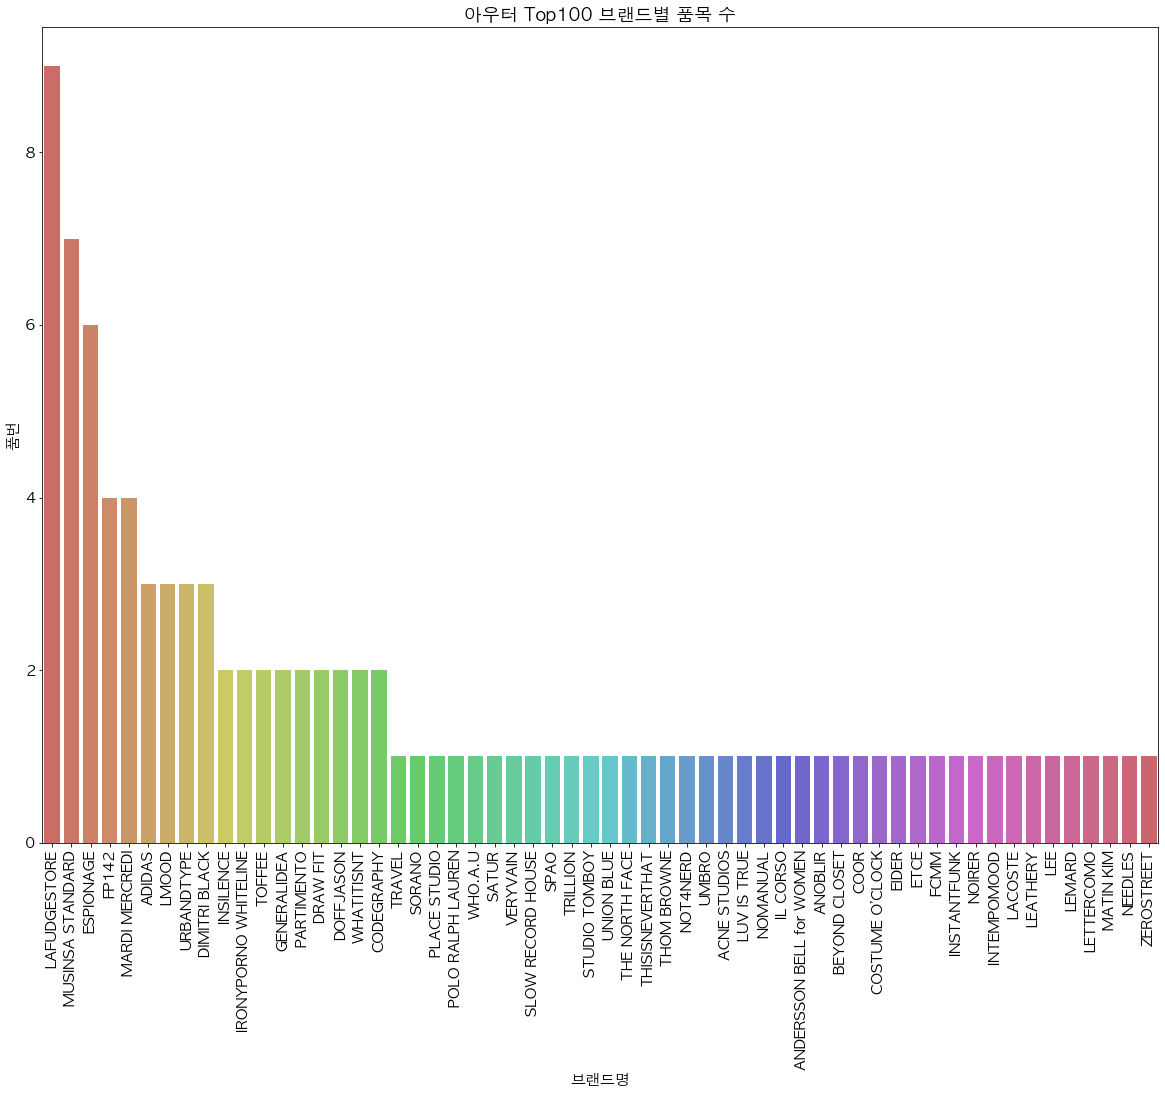

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x = '브랜드명', y='품번', data=data3_1, palette='hls')
plt.xticks(rotation=90)
plt.title('아우터 Top100 브랜드별 품목 수')